In [1]:
# Lab settings - please ingnore
# Make plots a resonable size
options(repr.plot.width=7, repr.plot.height=3.5)

<div class="big_title">LAB 5: Advanced data manipulation</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

In the previous labs, you learned....

how to identify objects like `variables` and `functions`, as well as some basic plotting techniques.

In this lab we will work on data cleaning tools and practices.


# Data manipulation using dplyr and tidyr

`dplyr` is a package for making tabular data manipulation easier. It pairs nicely with tidyr which enables you to swiftly convert between different data formats for plotting and analysis.

The `tidyverse` package is an "umbrella-package" that installs `tidyr`, `dplyr`, and several other packages useful for data analysis, such as `ggplot2`, `tibble`, etc.

The tidyverse package tries to address 3 common issues that arise when doing data analysis with some of the functions that come with R:

    1. The results from a base R function sometimes depend on the type of data.

    2. Using R expressions in a non standard way, which can be confusing for new learners.
    
    3. Hidden arguments, having default operations that new learners are not aware of.
    
You should already have installed and loaded the `tidyverse` package. If we haven't already done so, we can type install.packages("tidyverse") straight into the console. Then, to load the package type library(tidyverse)

Let's download the [dplyr cheat sheet] (https://github.com/rstudio/cheatsheets/raw/master/data-transformation.pdf) for reference as well 



In [8]:
install.packages("tidyverse")

Installing package into 'C:/Users/flyin/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\flyin\AppData\Local\Temp\Rtmp4cBIgD\downloaded_packages


In [9]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.3
v tibble  2.1.3     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# What are `dplyr` and `tidyr`?

The package `dplyr`provides easy tools for the most common data manipulation tasks. It is built to work directly with data frames, with many common tasks optimized by being written in a compiled language (C++). An additional feature is the ability to work directly with data stored in an external database. The benefits of doing this are that the data can be managed natively in a relational database, queries can be conducted on that database, and only the results of the query are returned.

This addresses a common problem with R in that all operations are conducted in-memory and thus the amount of data you can work with is limited by available memory. The database connections essentially remove that limitation in that you can connect to a database of many hundreds of GB, conduct queries on it directly, and pull back into R only what you need for analysis.

The package `tidyr` addresses the common problem of wanting to reshape your data for plotting and use by different R functions. Sometimes we want data sets where we have one row per measurement. Sometimes we want a data frame where each measurement type has its own column, and rows are instead more aggregated groups (e.g., a time period, an experimental unit like a plot or a batch number). Moving back and forth between these formats is non-trivial, and `tidyr` gives you tools for this and more sophisticated data manipulation.

## The experiment 
We conducted an experiment to evaluate the cummulative effects of drought and disease on the silver tree. We measured physiological responses of the plant such as photosynthetic oxygen evolution and electrical conductivity.

First, we'll download the data. 


As before, we'll read in our data using the `read_csv()` function from the tidyverse package `readr`. We will need to do the following:

1. Make a new directory on your Desktop and call it Lab5
1. Download the <span class="file">Silver Tree Study photosynthetis.csv</span> and <span class="file">Silver tree study conductance.csv</span> datasets from Brightspace and place them in your Lab5 directory.
1. Open R Studio and change your working directory to Lab5. If you don't remeber how to do this, review [this section](https://diego-ibarra.github.io/biol3782/week1/index.html#RStudio's-%22Working-Directory%22)

In [10]:
photosynthesis <- read_csv("Silver Tree Study photosynthetis.csv")

conductivity <- read_csv("Silver tree study conductance.csv")


Parsed with column specification:
cols(
  `Sample type` = col_character(),
  `Days after inoculation` = col_double(),
  Date = col_character(),
  Licor = col_double(),
  Trial = col_double(),
  Treatment = col_character(),
  Species = col_character(),
  `Plant Number` = col_double(),
  `Isolate Number` = col_double(),
  `Unique Sample Number` = col_double(),
  Obs = col_double(),
  Photosynthesis = col_double()
)
Parsed with column specification:
cols(
  `Sample type` = col_character(),
  `Days after inoculation` = col_double(),
  Date = col_character(),
  Licor = col_double(),
  Trial = col_double(),
  Treatment = col_character(),
  Species = col_character(),
  `Plant Number` = col_double(),
  `Isolate Number` = col_double(),
  `Unique Sample Number` = col_double(),
  Obs = col_double(),
  Conductance = col_double(),
  Ci = col_double()
)


Let's take a look at the two datasets below:

In [11]:
photosynthesis  %>% 
head(4)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.1459282
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,2,0.8224351
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,3,0.8382796
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,4,1.2894069


In [12]:
conductivity  %>% 
head(4)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Conductance,Ci
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,0.000407974,-4050.458
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,2,0.000454750,-2467.036
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,3,0.000673320,-1575.086
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,4,0.000470876,-3938.661


Since the experiment was run with two different instruments, we ended up with two different datasets of paired measurements. We can combined both datasets into one more useful dataset

# Joins

Join functions allow you to connect multiple tables based on common variables(columns) so that you can access info from multiple tables at once. There are (believe it or not) 6 different ways to join tables. 

The most useful of these is a `left join`, which takes a table (say table 1), and then adds all matching records from table 2. The basic syntax of `left_join` is listed below

`left_join`(dataframe 1, dateframe 2, by = "variable names")

R will automatically detect which columns two tables have in common IF they are called the same thing. If not, you have to feed the matching columns names into the join function.

## Types of Joins

* `left join`: resulting table will show all records from table 1 (the left hand table), and matching records from table 2 (the right hand table)

* `right join`: result shows all records from table 2, and matching records from table 1

* `inner join`: result shows only 'matched' records - where there is a matching value in both tables

* `full join`: result shows all records from both tables

* `anti join`: removes all records from table 1 that have a match in table 2

* `semi join`: removes all records from table 2 that have a match in table 1

We can create a new dataframe with information all the information from both `photosynthesis` and `conductivity` joining the two dataframes using the qualifying variables in the columns from "Sample type"to "Obs".


In [11]:
combined_data <- left_join(photosynthesis,conductivity, 
                           by =c("Sample type",
                                 "Days after inoculation", 
                                 "Date", 
                                 "Licor", 
                                 "Trial",
                                 "Treatment",
                                "Species",
                                "Plant Number",
                                "Isolate Number", 
                                "Unique Sample Number",
                                "Obs"))

Let's look at the combined dataset below

In [20]:
combined_data  %>% 
head(4)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.1459282,0.000407974,-4050.458
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,2,0.8224351,0.000454750,-2467.036
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,3,0.8382796,0.000673320,-1575.086
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,4,1.2894069,0.000470876,-3938.661


In [32]:
dim(combined_data)

[1] 1722   14

In [33]:
str(combined_data)

'data.frame':	1722 obs. of  14 variables:
 $ Sample type           : chr  "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" ...
 $ Days after inoculation: num  9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr  "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Licor                 : num  6800 6800 6800 6800 6800 6800 6800 6800 6800 6800 ...
 $ Trial                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr  "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr  "Both Pathogens" "Both Pathogens" "Both Pathogens" "Both Pathogens" ...
 $ Plant Number          : num  9 9 9 9 9 9 9 9 9 9 ...
 $ Isolate Number        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Unique Sample Number  : num  148 148 148 148 148 148 148 148 148 148 ...
 $ Obs                   : num  1 10 2 3 4 5 6 7 8 9 ...
 $ Photosynthesis        : num  0.0567 0.076 0.0606 0.0486 0.0747 ...
 $ Conductance           : num  0.0

<div class="Q"><br><br>

How many observations(rows) does `combined_data` have? 

ANSWER: 1722<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many columns does `combined_data` have? 

ANSWER: 14<br><br>

<br><br><div class="qhelp"></div></div>

We can see that `left_join` combined `photosynthesis` and `conductivity` data by all the criteria columns we specified above.

## Merge

Another way to combined datasets is to use the function `merge()`

<br><br><br>
<div class="startTASK"></div>

Using the help section, look at the syntax for merge

<div class="endTASK"></div>
<br><br><br>

Let's recreate the `combined_data` dataset using merge instead.

In [12]:
combined_data<-merge(photosynthesis,conductivity,all.x = TRUE, all.y = TRUE)

combined_data  %>% 
head(4)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,1,0.05671618,0.001441047,332.3998
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,10,0.07601768,0.001588715,318.1265
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,2,0.06055765,0.001520727,331.2409
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,9,NA,148,3,0.04863937,0.001897092,354.0128


In [34]:
dim(combined_data)

[1] 1722   14

In [35]:
str(combined_data)

'data.frame':	1722 obs. of  14 variables:
 $ Sample type           : chr  "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" "1DroughtBoth Pathogens9" ...
 $ Days after inoculation: num  9 9 9 9 9 9 9 9 9 9 ...
 $ Date                  : chr  "6/8/2018" "6/8/2018" "6/8/2018" "6/8/2018" ...
 $ Licor                 : num  6800 6800 6800 6800 6800 6800 6800 6800 6800 6800 ...
 $ Trial                 : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Treatment             : chr  "Drought" "Drought" "Drought" "Drought" ...
 $ Species               : chr  "Both Pathogens" "Both Pathogens" "Both Pathogens" "Both Pathogens" ...
 $ Plant Number          : num  9 9 9 9 9 9 9 9 9 9 ...
 $ Isolate Number        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ Unique Sample Number  : num  148 148 148 148 148 148 148 148 148 148 ...
 $ Obs                   : num  1 10 2 3 4 5 6 7 8 9 ...
 $ Photosynthesis        : num  0.0567 0.076 0.0606 0.0486 0.0747 ...
 $ Conductance           : num  0.0

<div class="Q"><br><br>

What does the arguement "by" in the merge function do? 

ANSWER: specifies the columns used as classifiers for merging<br><br>

<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

Let us download the task datasets task_data_fox_size.csv and task_data_fox_weight.csv

Using `Joins` or `merge`, create a new dataset called `fox_data` combining data from both <span class="file">task_data_fox_size.csv</span> and <span class="file">task_data_fox_weight.csv</span> 

<div class="endTASK"></div>

<br><br><br>

<div class="Q"><br><br>

How many rows does fox_data have? 

ANSWER: 30<br><br>

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many columns does fox_data have? 

ANSWER: 6<br><br>

<br><br><div class="qhelp"></div></div>

Next, we're going to learn some of the most common `dplyr` functions:

* `select()`: subset columns
* `filter()`: subset rows on conditions
* `mutate()`: create new columns by using information from other columns
* `group_by()` and `summarize()`: create summary statistics on grouped data
* `arrange()`: sort results
* `count()`: count discrete values

_________________________________________________________________________________________________________________________

# Selecting columns and filtering rows

If we only want to keep certain columns of data, we can use `select()`. The first argument to this function is the dataset, and the subsequent arguments are the columns to keep.

select(data, column names)

In the following code, we have selected the columns "Sample type", "Photosynthesis", and "Conductance". 

In [40]:
select(combined_data, `Sample type`,Photosynthesis, Conductance)  %>% 
head(4)

Sample type,Photosynthesis,Conductance
1DroughtBoth Pathogens9,0.05671618,0.001441047
1DroughtBoth Pathogens9,0.07601768,0.001588715
1DroughtBoth Pathogens9,0.06055765,0.001520727
1DroughtBoth Pathogens9,0.04863937,0.001897092


We can also use `:` to select multiple columns from left to right.

In [41]:
select(combined_data, `Sample type`:Species,Photosynthesis, Conductance)  %>% 
head(4)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Photosynthesis,Conductance
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.05671618,0.001441047
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.07601768,0.001588715
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.06055765,0.001520727
1DroughtBoth Pathogens9,9,6/8/2018,6800,1,Drought,Both Pathogens,0.04863937,0.001897092


To select all columns except certain ones, put a "-" in front of the variable to exclude it. In the following code, we want to exclude the columns "Licor" and "Obs"

In [43]:
select(combined_data, -Licor, -Obs)  %>% 
head(4)

Sample type,Days after inoculation,Date,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Photosynthesis,Conductance,Ci
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.05671618,0.001441047,332.3998
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.07601768,0.001588715,318.1265
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.06055765,0.001520727,331.2409
1DroughtBoth Pathogens9,9,6/8/2018,1,Drought,Both Pathogens,9,NA,148,0.04863937,0.001897092,354.0128


<div class="Q"><br><br>

Using the "combined_data" dataset and the "-", what would the code look like to select all columns except Species?
    
ANSWER to be removed in final iteration: select(combined_data, -Species) <br><br>
    
    
    other mutiple choice options: 
    
    select(combined_data, `Sample type`:Treatment, `Plant Number`:Conductance)
    
    select(combined_data, Species)
    
    select(combined_data, -Species) 

<br><br><div class="qhelp"></div></div>


What if we only want to select the data from one Species? You can also choose rows based on a specific criterion using the `filter()` function. The syntax for `filter()` is found below

filter(dataset, selection criteria)

In the following code, we want to select all data from Indigenous Pathogen Species only.

In [172]:
filter(combined_data, Species == "Indigenous Pathogen")  %>% 
tail(4)

,Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
566,2WetIndigenous Pathogen 9,35,7/4/2018,6800,2,Wet,Indigenous Pathogen,9,5,94,6,8.830209,0.1538539,282.1423
567,2WetIndigenous Pathogen 9,35,7/4/2018,6800,2,Wet,Indigenous Pathogen,9,5,94,7,8.879089,0.1460335,275.9352
568,2WetIndigenous Pathogen 9,35,7/4/2018,6800,2,Wet,Indigenous Pathogen,9,5,94,8,8.921487,0.1623246,285.2202
569,2WetIndigenous Pathogen 9,35,7/4/2018,6800,2,Wet,Indigenous Pathogen,9,5,94,9,8.860731,0.1550579,282.4953


We can also filter by multiple criteria. Say we want Obs 1 data from Indigenous Pathogen Species only. We can use the `filter()` function and expand out selection criteria.

In [170]:
filter(combined_data, Species == "Indigenous Pathogen", Obs ==1) %>% 
head(4)

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtIndigenous Pathogen 1,17,6/16/2018,6800,1,Drought,Indigenous Pathogen,1,1,116,1,0.36482248,0.003559033,231.1741
1DroughtIndigenous Pathogen 1,22,6/21/2018,6400,1,Drought,Indigenous Pathogen,1,1,49,1,0.02565309,0.004572983,384.1540
1DroughtIndigenous Pathogen 1,9,6/8/2018,6400,1,Drought,Indigenous Pathogen,1,1,3,1,1.14592822,0.000407974,-4050.4585
1DroughtIndigenous Pathogen 2,37,7/6/2018,6800,1,Drought,Indigenous Pathogen,2,1,80,1,0.03939854,0.002624114,370.6015


With intermediate steps, you create a temporary data frame and use that as input to the next function. Let's first take a look at our Species data to see if we can clean up our dataset. We not that Species is a character column. Using the function `as.factor()` we can convert Species entries into factors then use the `levels()` function to examine the factor levels.

In [13]:
#convert to factor

combined_data$Species<-as.factor(combined_data$Species)

# provides levels of a factor using the levels command.  

levels(combined_data$Species)  

[1] "Both Pathogens"      "Control"             "Exotic Pathogen"    
[4] "Indigenous Pathogen"

For simplicity, let's create a new object `data_filtered` and select only rows where Photosyntheis < 200 and Species is not equal to "Both Pathogens".

In [17]:
data_filtered<- combined_data %>% 
filter(Photosynthesis <200 & Species !="Both Pathogens")

summary(data_filtered$Species)

data_filtered

Both Pathogens             Control     Exotic Pathogen Indigenous Pathogen 
                  0                 563                 508                 569

Sample type,Days after inoculation,Date,Licor,Trial,Treatment,Species,Plant Number,Isolate Number,Unique Sample Number,Obs,Photosynthesis,Conductance,Ci
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,1,0.7101345,0.005128090,174.1684
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,10,3.0909224,0.016987563,103.6757
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,11,2.8754158,0.017134086,126.0893
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,12,2.8534106,0.017291149,130.4522
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,13,2.9267403,0.017253899,122.9433
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,2,1.0517300,0.007082619,158.2148
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,3,1.5445176,0.008902013,118.3503
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,4,1.7659935,0.010729958,132.1754
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,5,1.7566293,0.011152041,143.3055
1DroughtControl1,22,6/21/2018,6400,1,Drought,Control,1,5,51,6,1.8235920,0.011220645,135.3768


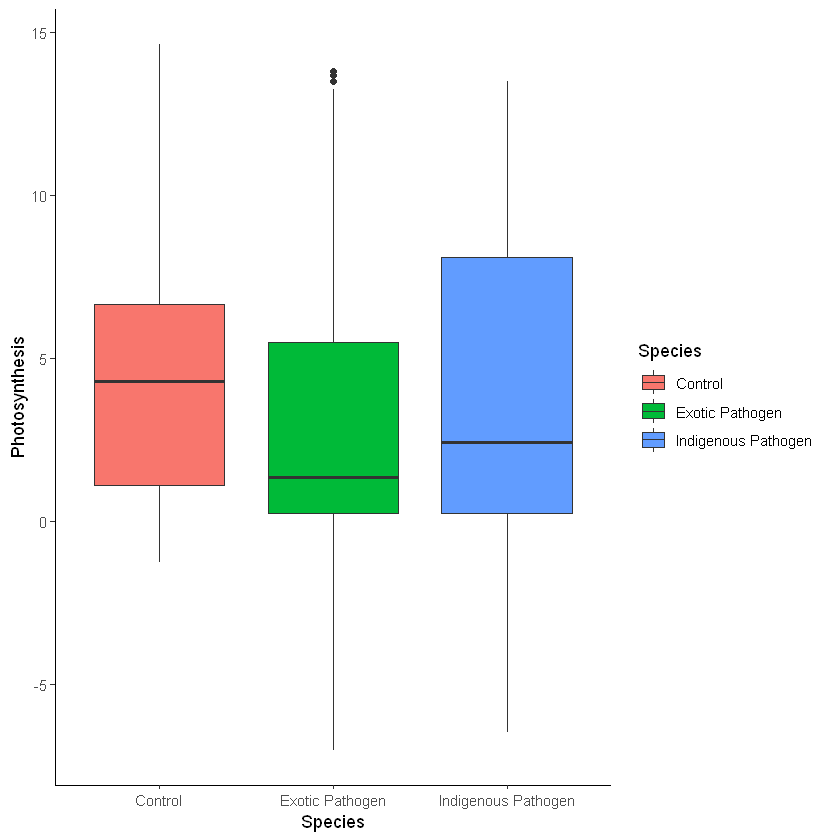

In [15]:
data_filtered %>% 
ggplot()+
geom_boxplot(aes(x=Species, y=Photosynthesis, fill=Species))+
theme_classic()

<div class="Q"><br><br>

What does `!=` in the `select()` funtion mean?
    
ANSWER to be removed in final iteration: Not equal to <br><br>

<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

Create a dataset called `male_fox_data` wherein only data from male foxes are included.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many rows does `male_fox_data` have?
    
ANSWER to be removed in final iteration: 15 <br><br>

<br><br><div class="qhelp"></div></div>

_________________________________________________________________________

# Reshaping your dataframe with **pivot_longer** and **pivot_wider()**

Useful links:

1. [Pivot tutorial](https://tidyr.tidyverse.org/articles/pivot.html)
1. [pivot_longer](https://rdrr.io/github/tidyverse/tidyr/man/pivot_longer.html)
1. [pivot_wider](https://tidyr.tidyverse.org/reference/pivot_wider.html)

Sometimes you may need to alter the layout of tabluar datasets while preserving the values and relationships contained within. This can also be very useful when plotting data from very large datasets with multiple columns. You may have heard of `spread()` and `gather()`. These are functions with similar but more limited functionality and were replaced by `pivot_wider()` and `pivot_longer()`.

## pivot_wider

**pivot_wider** moves rows into columns (long to wide format)

Let's use `pivot_wider()` to turn Species factors into column names by changing the dataset from long to wide format.

In [30]:
data_wide<-data_filtered  %>% 
filter(Treatment=="Drought", Obs==1) %>% 
select(Species, `Sample type`, Date, Photosynthesis) %>% 
pivot_wider(names_from="Species", values_from="Photosynthesis") 

data_wide %>% 
head(4)

Sample type,Date,Control,Exotic Pathogen,Indigenous Pathogen
1DroughtControl1,6/21/2018,0.7101345,NA,NA
1DroughtControl1,6/8/2018,1.5643579,NA,NA
1DroughtControl10,6/12/2018,0.3439647,NA,NA
1DroughtControl10,7/4/2018,0.4086491,NA,NA


## pivot_longer

In this situation we are gathering the column names and turning them into a pair of new variables. One variable represents the column names as values, and the other variable contains the values previously associated with the column names.

**pivot_longer** moves columns into rows (wide to long format). `pivot_longer` takes several arguements but the most important ones for this exercise are `names_to` and `values_to`. `names_to` creates a new classifier/criteria column, taking arguements from your column names. `values_to` takes values from those columns and creates a new column of values classfied by the factors created by `names_to`.

Let's use `pivot_longer` to transform `data_wide` back into `data_filtered`.

In [44]:
data_wide %>%
pivot_longer(names_to="Species", values_to="Photosynthesis", values_drop_na = TRUE, !`Sample type`:Date) %>% 
head(4)

Sample type,Date,Species,Photosynthesis
1DroughtControl1,6/21/2018,Control,0.7101345
1DroughtControl1,6/8/2018,Control,1.5643579
1DroughtControl10,6/12/2018,Control,0.3439647
1DroughtControl10,7/4/2018,Control,0.4086491



# Nested functions vs Pipes

What if you want to select and filter at the same time? There are three ways to do this: use intermediate steps, nested functions, or pipes.

What if we wanted to select only Sample type, Photosynthesis and Conductance from the Control and Indigenous Pathogen Species? We could create multiple objects.

We can use `%in%` with `select()`to specify a list of paramters/levels we want to keep.

In [73]:
#Creates a new data frame with rows containing only data from Indigenous Pathogen and Control Species
species_filtered <- filter(data_filtered, Species %in% c("Indigenous Pathogen", "Control")) 

#Then only selects the columns "Sample type", Species,Photosynthesis, Conductance)  
 species_sml<- select(species_filtered, `Sample type`, Species, Photosynthesis, Conductance)

#inspect new dataframe

species_sml %>% 
head(4)

Sample type,Species,Photosynthesis,Conductance
1DroughtControl1,Control,0.7101345,0.00512809
1DroughtControl1,Control,3.0909224,0.01698756
1DroughtControl1,Control,2.8754158,0.01713409
1DroughtControl1,Control,2.8534106,0.01729115


This is readable, but is clunky and can clutter up your workspace with lots of small objects that youd have to keep track of.

Another method would be to nest functions (i.e. one function inside of another), like this:

In [69]:
species_sml <- select(filter(data_filtered, Species %in% c("Indigenous Pathogen", "Control")),
                      `Sample type`, Species, Photosynthesis, Conductance)

species_sml %>% 
head(4)

Sample type,Species,Photosynthesis,Conductance
1DroughtControl1,Control,0.7101345,0.00512809
1DroughtControl1,Control,3.0909224,0.01698756
1DroughtControl1,Control,2.8754158,0.01713409
1DroughtControl1,Control,2.8534106,0.01729115


R evaluates the expression from the inside out (in this case, filtering, then selecting). **I would avoid this method since it makes debugging your code a nightmare!**

A better method is to use pipes. Pipes let you take the output of one function and send it directly to the next, which is useful when you need to do many things to the same dataset. Pipes in R look like `%>%` and are made available via the `magrittr` package, installed automatically with `dplyr`. 

If you use RStudio, you can type the pipe with `Ctrl + Shift + M` if you have a PC or `Cmd + Shift + M` if you have a Mac.

We will re-create the `species_sml` dataset using pipes. First, we want to filter data from the `data_filtered` dataset, keeping rows where Species is either "Indigenous Pathogen" or "control", then select only the Sample type, Species, Photosynthesis, Conductance columns. We will use the pipe to send the `cdata_filtered` dataset through the `filter()` then `select()` functions. 

In [71]:
species_sml<-data_filtered %>%
  filter(Species %in% c("Indigenous Pathogen", "Control")) %>% 
  select(`Sample type`, Species, Photosynthesis, Conductance)  

species_sml %>% 
head(4)

Sample type,Species,Photosynthesis,Conductance
1DroughtControl1,Control,0.7101345,0.00512809
1DroughtControl1,Control,3.0909224,0.01698756
1DroughtControl1,Control,2.8754158,0.01713409
1DroughtControl1,Control,2.8534106,0.01729115


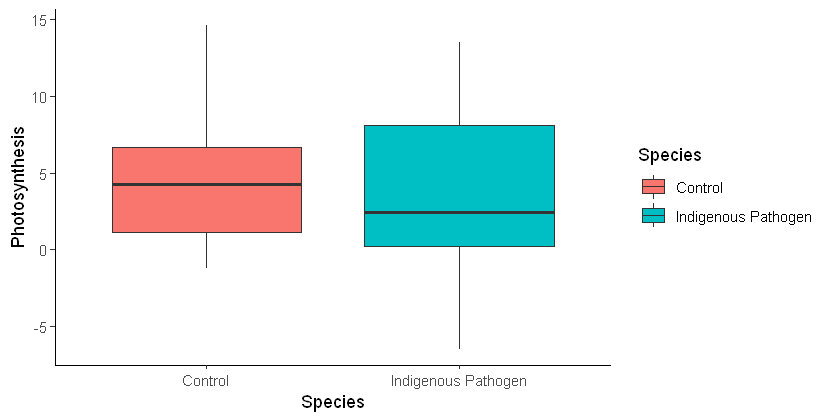

In [72]:
species_sml %>% 
ggplot()+
geom_boxplot(aes(x=Species, y=Photosynthesis, fill=Species))+
theme_classic()

Since `%>%` takes the object on its left and passes it as the first argument to the function on its right, we don't need to explicitly include the data frame as an argument to the `filter()` and `select()` functions any more.


<br><br><br>
<div class="startTASK"></div>

Using the `fox_data` dataset, create a new object `fox_data_cleaned` that contains only the columns ID, Sex, avfood, from female foxes only.
<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many rows are there in `fox_data_cleaned`?
    
ANSWER to be removed in final iteration: 15 <br><br>
    
<br><br><div class="qhelp"></div></div>

_______________________________________________________________________________________________

# Mutate

We can use `mutate()` to create new columns based on the values in existing columns, for example to do unit conversions, or to find the ratio of values in two columns.

For example, we can convert Photosynthesis oxygen measurements from mg/L to ug/L by creating a new column called `Photosynthesis_ppb`

In [80]:
data_filtered %>%
  mutate(Photosynthesis_ppb = Photosynthesis*1000) %>% 
select(`Sample type`, Photosynthesis, Photosynthesis_ppb) %>% 
head(4)

Sample type,Photosynthesis,Photosynthesis_ppb
1DroughtControl1,0.7101345,710.1345
1DroughtControl1,3.0909224,3090.9224
1DroughtControl1,2.8754158,2875.4158
1DroughtControl1,2.8534106,2853.4106


In [ ]:
We can also use mutate to change variable level names.

In [124]:
change_lables<-data_filtered %>%
mutate(Species=factor(Species,
                     levels=c("Control", "Exotic Pathogen","Indigenous Pathogen"),
                     labels =c("Control", "P.Cinnamomi", "P.Multivora")))

levels(change_lables$Species)

[1] "Control"     "P.Cinnamomi" "P.Multivora"

We can also use `mutate()` to change variable types. Here, we will convert some variables from character to factors. We can use the function `sapply()` to see the column variable classes

In [142]:
data_filtered<-data_filtered %>% 
mutate(`Sample type`= factor(`Sample type`),
      Trial = factor(Trial),
      Treatment = factor(Treatment),
      Species = factor(Species),
      `Days after inoculation`=factor(`Days after inoculation`))

sapply(data_filtered,class)

Sample type Days after inoculation                   Date 
              "factor"               "factor"            "character" 
                 Licor                  Trial              Treatment 
             "numeric"               "factor"               "factor" 
               Species           Plant Number         Isolate Number 
              "factor"              "numeric"              "numeric" 
  Unique Sample Number                    Obs         Photosynthesis 
             "numeric"              "numeric"              "numeric" 
           Conductance                     Ci 
             "numeric"              "numeric"

<br><br><br>
<div class="startTASK"></div>

In fox_data, create a new column called 'Consumption' which will contain values of avfood divided by weight
i.e Consumption =avfood/weight

<div class="endTASK"></div>
<br><br><br>

_______________________________________________________________________________________________

# Split-apply-combine data analysis and the summarize() function

Many data analysis tasks can be approached using the split-apply-combine paradigm: 

1. split the data into groups 
1. apply some analysis to each group
1. combine the results. 

dplyr makes this very easy through the use of the `group_by()` function. `group_by()` is often used together with `summarize()`, which collapses each group into a single-row summary of that group. `group_by()` takes as arguments the column names that contain the categorical variables for which you want to calculate the summary statistics. 

In the example below, we compute the mean and standard deviation of Photosynthesis measurements by Treatment.

In [83]:
data_filtered %>% 
group_by(Treatment) %>% 
summarize(average=mean(Photosynthesis),
        dev=sd(Photosynthesis))

`summarise()` ungrouping output (override with `.groups` argument)


Treatment,average,dev
Drought,1.232575,2.488081
Wet,5.918684,3.682469


<div class="Q"><br><br>

What would the code inside the summarise function look like if we wanted to get the mean of Conductance?
    
ANSWER to be removed in final iteration: summarize(average=mean(Conductance)) <br><br>
    
<br><br><div class="qhelp"></div></div>

Let's take a look at our data graphically. We notice that the solid horrizontal lines representing our average Wet and Drought values don't line up with the boxplot median. This indicates that our data might not be normally distributed. We may want to use the `median()` function to find the midpoint of the data instead. 

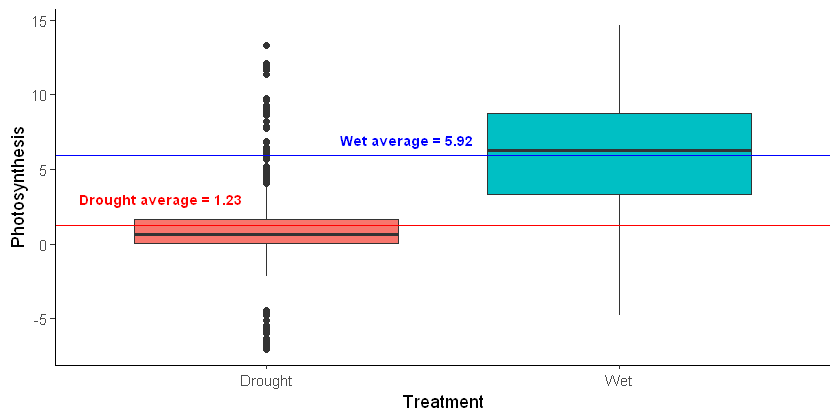

In [143]:
data_filtered %>% 
group_by(Treatment) %>% 
ggplot()+
geom_boxplot(aes(x=Treatment, y=Photosynthesis, fill=Treatment))+
geom_hline(aes(yintercept=1.232575), color="red")+
annotate("text", x =0.7, y = 3,label ="Drought average = 1.23", size = 3,fontface =2, color="red")+
geom_hline(aes(yintercept=5.918684), color="blue")+
annotate("text", x =1.4, y = 7,label ="Wet average = 5.92", size = 3,fontface =2, color="blue")+
theme_classic()+
guides(fill=FALSE)

We can also group by mutliple columns.

In [144]:
data_filtered %>% 
group_by(Treatment, Species) %>% 
summarize(median=median(Photosynthesis))

`summarise()` regrouping output by 'Treatment' (override with `.groups` argument)


Treatment,Species,median
Drought,Control,1.0502198
Drought,Exotic Pathogen,1.0440030
Drought,Indigenous Pathogen,0.3459798
Wet,Control,6.2841864
Wet,Exotic Pathogen,4.7105453
Wet,Indigenous Pathogen,7.2282008


<div class="Q"><br><br>

What would the code inside the group_by function look like if we wanted to group by both Date, Treatment and Species?
    
ANSWER to be removed in final iteration: group_by(Date, Treatment, Species) <br><br>
    
<br><br><div class="qhelp"></div></div>

We can also arrange the values in order of mean_ppb using the `arrange()` function. To sort in descending order, we need to add the `desc()` function.

In [145]:
data_filtered %>% 
group_by(Treatment, Species) %>% 
summarize(median=median(Photosynthesis)) %>%
  arrange(desc(median))

`summarise()` regrouping output by 'Treatment' (override with `.groups` argument)


Treatment,Species,median
Wet,Indigenous Pathogen,7.2282008
Wet,Control,6.2841864
Wet,Exotic Pathogen,4.7105453
Drought,Control,1.0502198
Drought,Exotic Pathogen,1.0440030
Drought,Indigenous Pathogen,0.3459798


<div class="Q"><br><br>

Using the help section, what would your arrange function code look like to arrange median in ascending order?
    
ANSWER to be removed in final iteration: arrange(median) <br><br>

multiple choice options: arrange(asc(median))

arrange(sort(median))

arrange(order(median))
    
<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

In `fox_data`, find the mean weight by sex of the fox population.


<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

What is the mean weight of Male foxes?
    
ANSWER to be removed in final iteration: <br><br>


<br><br><div class="qhelp"></div></div>

_______________________________________________________________________________________________

# Counting observations

When working with data, we often want to know the number of observations found for each factor or combination of factors. For this task, dplyr provides `count()`. Let's summarise the number of measurements made for each plant on each day.

In [146]:
data_filtered %>%
    count(`Sample type`, `Days after inoculation`) %>% 
head(4)

Sample type,Days after inoculation,n
1DroughtControl1,9,10
1DroughtControl1,22,13
1DroughtControl10,13,10
1DroughtControl10,35,10


We can also use `summarise()`,`n()` with `group_by()` to attain similar results.

In [147]:
data_filtered %>%
    group_by(`Sample type`, `Days after inoculation`) %>%
    summarise(count = n())  %>% 
head(4)

`summarise()` regrouping output by 'Sample type' (override with `.groups` argument)


Sample type,Days after inoculation,count
1DroughtControl1,9,10
1DroughtControl1,22,13
1DroughtControl10,13,10
1DroughtControl10,35,10


There should be at least 10 measurements per plant per day (count >= 10). Say we wanted to see how many plants were there per Treatmet and Species, we could use the function `n_distinct()` to count unique instances and remove duplicates. 

In [148]:
plant.count<- data_filtered %>% 
group_by(Treatment,Species) %>% 
summarize(count=n_distinct(`Sample type`)) 

plant.count

`summarise()` regrouping output by 'Treatment' (override with `.groups` argument)


Treatment,Species,count
Drought,Control,17
Drought,Exotic Pathogen,16
Drought,Indigenous Pathogen,14
Wet,Control,17
Wet,Exotic Pathogen,15
Wet,Indigenous Pathogen,17


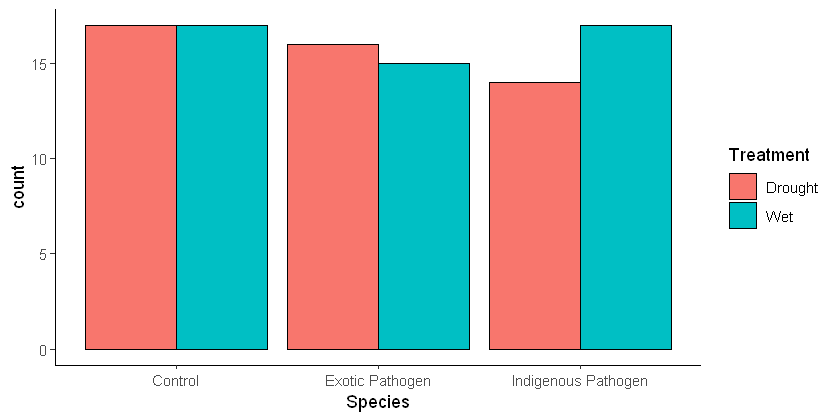

In [149]:
plant.count %>% 
ggplot(aes(x=Species, y=count, fill =Treatment))+
geom_col(position="dodge", color="black")+
theme_classic()

We can proceed with `arrange()` to sort the table according to a number of criteria so that we have a better comparison. For instance, we might want to arrange the table above in:

1. by Treatment and,
1. in descending order of the count:

In [150]:
plant.count %>%
  arrange(Treatment, desc(count))

Treatment,Species,count
Drought,Control,17
Drought,Exotic Pathogen,16
Drought,Indigenous Pathogen,14
Wet,Control,17
Wet,Indigenous Pathogen,17
Wet,Exotic Pathogen,15


<div class="Q"><br><br>

What is the difference between the functions n() and n_distinct()?
    
ANSWER to be removed in final iteration: n() counts all observations. n_distinct() counts unique observations and excludes duplicates <br><br>
    
<br><br><div class="qhelp"></div></div>

# Preliminary data exmaination

Now that we've got the basics down, let's play around with our data. 

## Mean per plant

Let's take a look at the mean photosynthesis value per plant while keeping our other variables of interest. Here we are calculating a plant average for each plant. Note that we did not use the same plants every time we took measurements (1DroughtControl1 was only measured on days 9 and 22). We could only measure <30 plants per day, so we randomly selected them from the treatments each time we went to measure.

In [151]:
Plant.Mean.Photo <- data_filtered %>% 
group_by(`Sample type`,Trial,Treatment,Species,`Days after inoculation`) %>% 
summarize(photo_average=mean(Photosynthesis,na.rm=TRUE))

Plant.Mean.Photo  %>% 
head(4)

`summarise()` regrouping output by 'Sample type', 'Trial', 'Treatment', 'Species' (override with `.groups` argument)


Sample type,Trial,Treatment,Species,Days after inoculation,photo_average
1DroughtControl1,1,Drought,Control,9,1.6631289
1DroughtControl1,1,Drought,Control,22,2.1347472
1DroughtControl10,1,Drought,Control,13,0.4922988
1DroughtControl10,1,Drought,Control,35,0.5280732


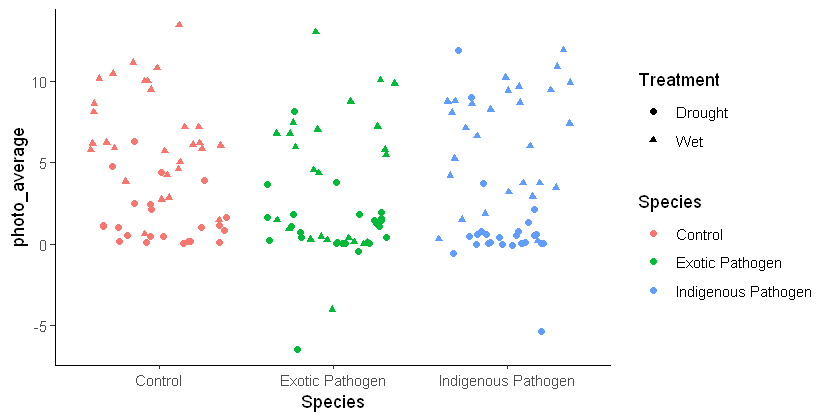

In [152]:
Plant.Mean.Photo %>% 
ggplot(aes(Species,photo_average,shape=Treatment,color=Species))+
geom_point(position="jitter")+
theme_classic()

Each plant is a sampling unit, so we want to conduct our analysis with a single value for each plant. If we include each measurement as a seperate observation, we are incorporating pseudoreplication because each measurement was not independant (10 measurements were made on a single plant–therefore, each measurement is dependant on the plant).

## Mean per group

Ok now that we have the means per plant, we can look at the means per trial, treatment, etc.

In [167]:
Group.Mean.Photo<-Plant.Mean.Photo %>% 
group_by(Treatment,Species,`Days after inoculation`) %>% 
summarize(count=n(), 
          ave=mean(photo_average),
          dev=sd(photo_average),
          se=dev/sqrt(count)
         )

Group.Mean.Photo  %>% 
head(4)

`summarise()` regrouping output by 'Treatment', 'Species' (override with `.groups` argument)


Treatment,Species,Days after inoculation,count,ave,dev,se
Drought,Control,3,1,1.1315650,NA,NA
Drought,Control,6,2,0.6558923,0.6616764,0.4678758
Drought,Control,9,5,2.5938583,2.8121587,1.2576356
Drought,Control,13,1,0.4922988,NA,NA


<span class="note"></span> If there was only one plant in a group, the standard deviation, `dev`could not be calculated because there is no variation Some of the data might be missing and we would need to address this in real analysis.

We can plot the mean values from each Species and each Treatment on each day they were measured.

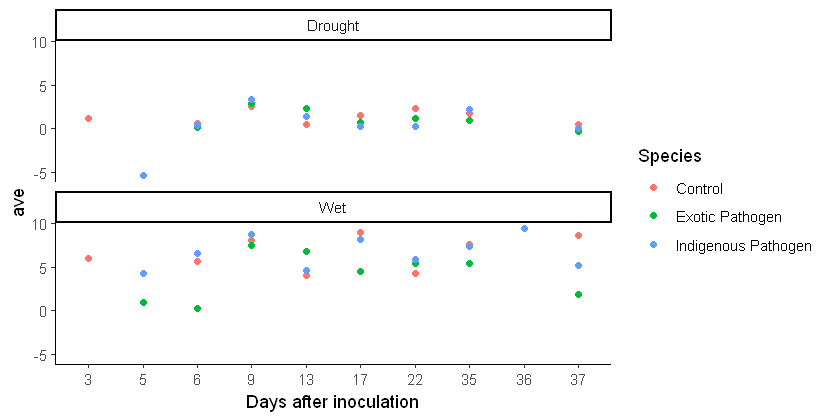

In [162]:
ggplot(Group.Mean.Photo,aes(x=`Days after inoculation`,y=ave,color=Species))+
geom_point()+
facet_wrap(~Treatment,ncol=1) +
theme_classic()

This plot reveals some concerns: only control plants were measured on day 3 and no control plants were measured on day 5. Only one group of plants measured on day 36. Lots of errors in data, demonstrating the importance of exploring your data graphically!

Let's see if we can add estimates of error to our measurments.

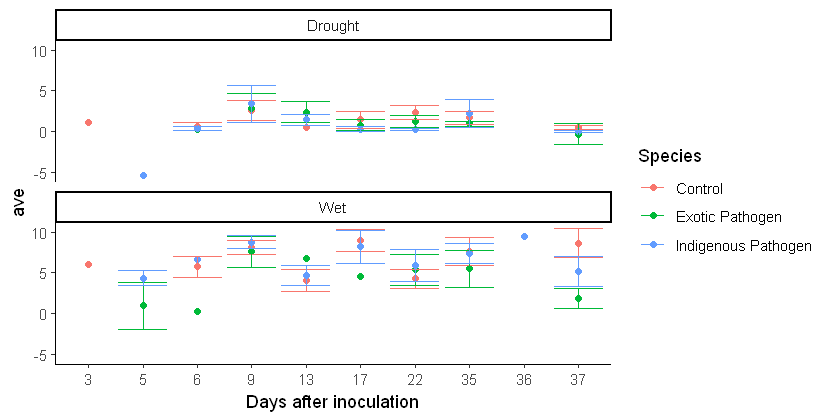

In [169]:
ggplot(Group.Mean.Photo,aes(x=`Days after inoculation`,y=ave,color=Species))+
geom_point()+
geom_errorbar(aes(ymin=ave-se, ymax=ave+se))+
facet_wrap(~Treatment,ncol=1) +
theme_classic()

_________________________________________________________________________

# Exporting data

Now that you have learned how to use dplyr to extract information from or summarize your raw data, you may want to export these new data sets to share them with your collaborators or for archival.

Similar to the `read_csv()` function used for reading CSV files into R, there is a `write_csv()` function that generates CSV files from data frames.

Before using `write_csv()`, we are going to create a new folder, data, in our working directory that will store this generated dataset. We don't want to write generated datasets in the same directory as our raw data. It's good practice to keep them separate. The data_raw folder should only contain the raw, unaltered data, and should be left alone to make sure we don't delete or modify it. In contrast, our script will generate the contents of the data directory, so even if the files it contains are deleted, we can always re-generate them.

Now that our data set is ready, we can save it as a CSV file in our data folder.


In [42]:
write_csv(surveys_complete, file = "data/surveys_complete.csv")

ERROR: Error in write_csv(surveys_complete, file = "data/surveys_complete.csv"): unused argument (file = "data/surveys_complete.csv")


<span class="console"></span> <br>
----------------------------- <br>
<span class="editor"></span> <br>
----------------------------- <br>
<span class="c2c"></span> <br>
<div class="c2c"></div> <br>
----------------------------- <br>
<span class="run"></span> <br>
<div class="run"></div> <br>
----------------------------- <br>
<span class="runcell"></span> <br>
<div class="runcell"></div> <br>
----------------------------- <br>
<span class="file">Text</span> <br>
<div class="file">Text</div> <br>
----------------------------- <br>
<span class="important"></span> <br>
<div class="important"></div> <br>
----------------------------- <br>
<span class="note"></span> <br>
<div class="note"></div> <br>
----------------------------- <br>
<span class="checkpoint">Text</span> <br>
<div class="checkpoint">Text</div> <br>
-----------------------------
<span class="codeerror">Text</span> <br>
<div class="codeerror">Text</div> <br>
----------------------------- <br>
<span class="lineerror">Text</span> <br>
<div class="lineerror">Text</div> <br>
----------------------------- <br>
<span class="terminal"></span> <br>
<div class="terminal"></div> <br>
----------------------------- <br>
<span class="terminalBlock">Text</span> <br>
<div class="terminalBlock">Text</div> <br>
----------------------------- <br>
<span class="nomenclature">nomenclature</span> <br>
<div class="nomenclature">nomenclature</div> <br>
----------------------------- <br>
<span class="code">code</span> <br>
<div class="code">code</div> <br>
----------------------------- <br>
<span class="rendered_html">rendered_html</span> <br>
<div class="rendered_html">rendered_html</div> <br>
----------------------------- <br>

<br><br><br>
<div class="startTASK"></div>

Write task here

<div class="endTASK"></div>
<br><br><br>



<img src="../media/R_logo.png" width="150px">
<a href="bad_layout.png" target="_blank"><img src="bad_layout.png" width="700px"></a>

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [1]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) ': '; white-space: pre; }.T::before {counter-increment: task_num;
    content: 'Task ' counter(task_num) ': ';</style>")